In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import shutil
from pathlib import Path

matplotlib.style.use('seaborn')

In [ ]:
# Configurations

make_country_histograms = False  # 45min, 250MB
make_continent_histograms = False  # 5min, 5MB
make_aggregate_histograms = False  # 1min, 1MB

In [2]:
raw_data = pd.read_csv(r"Data\Raw_data\owid-covid-data.csv")
data = pd.read_csv(r"Data\Sliced_data\covid_data.csv")

data.head()

,location,date,population,new_cases,new_deaths,total_cases,total_deaths,caseRate,deathRate,deathCaseRatio
0,Afghanistan,2020-02-24,39835428.0,5.0,NaN,5.0,NaN,1.255164e-07,NaN,NaN
1,Afghanistan,2020-02-25,39835428.0,0.0,NaN,5.0,NaN,1.255164e-07,NaN,NaN
2,Afghanistan,2020-02-26,39835428.0,0.0,NaN,5.0,NaN,1.255164e-07,NaN,NaN
3,Afghanistan,2020-02-27,39835428.0,0.0,NaN,5.0,NaN,1.255164e-07,NaN,NaN
4,Afghanistan,2020-02-28,39835428.0,0.0,NaN,5.0,NaN,1.255164e-07,NaN,NaN


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'NorthAmerica', 'SouthAmerica', 'Oceania']
cont_label = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

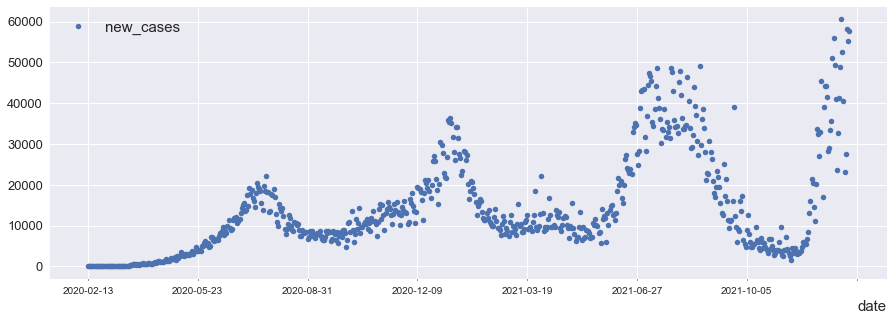

In [8]:
df1 = data.set_index('location')

_ = df1.loc['Africa'].plot(x='date', y='new_cases', style='.', figsize=(15,5), title='')
fig = _.get_figure()

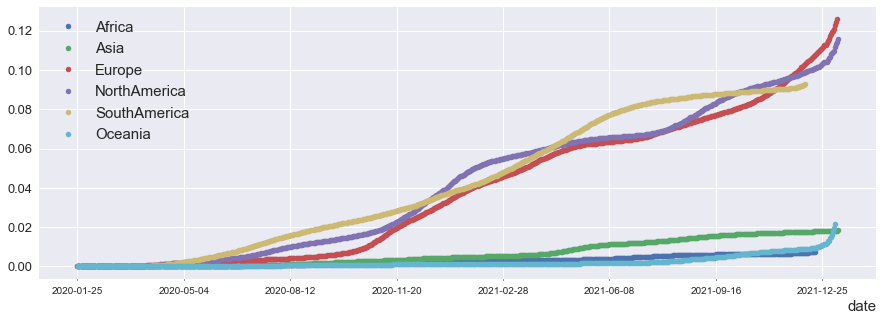

In [5]:
# Add a new column to the dataframe and plot multiple series on the same canvas

# Cases per capita per continent
data["cases_rate"] = data['total_cases'] / data['population']

df1 = data.set_index('location')

# Cases rate by continent
for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'cases_rate', style = '.', figsize = (15,5), label = continent, title = '')
    else:
        df1.loc[continent].plot(x = 'date', y = 'cases_rate', style = '.', figsize = (15,5), label = continent, ax=ax)

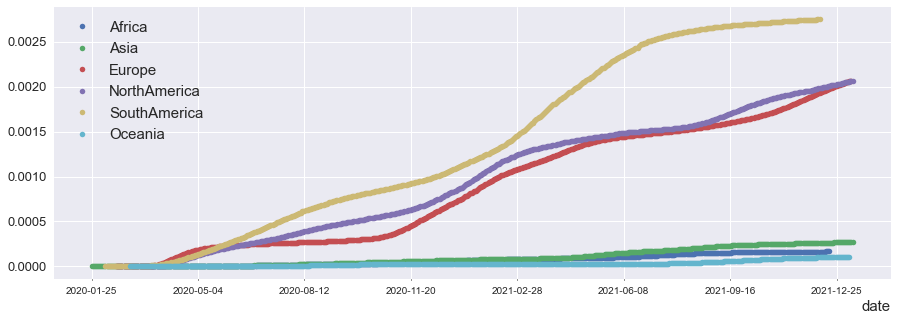

In [6]:
# Deaths per capita per continent

data["death_rate"] = data['total_deaths'] / data['population']

df1 = data.set_index('location')

# Cases rate by continent
for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'death_rate', style = '.', figsize = (15,5), label = continent, title = '')
    else:
        df1.loc[continent].plot(x = 'date', y = 'death_rate', style = '.', figsize = (15,5), label = continent, ax=ax)

(0.0, 0.11)

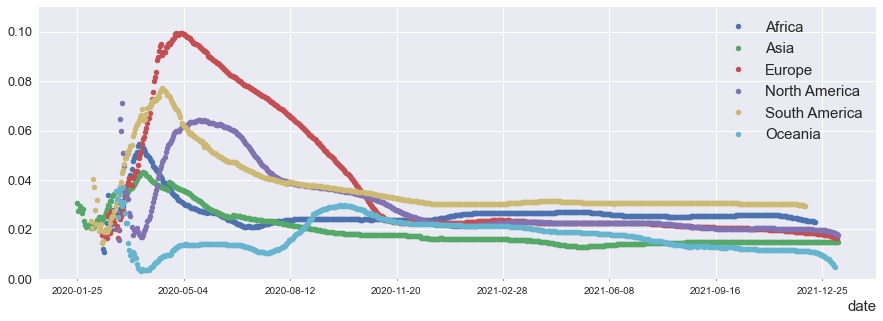

In [7]:
# Deaths / Cases by continent

data["deathCaseRatio"] = data['total_deaths'] / data['total_cases']  # Add new column to dataframe
df1 = data.set_index('location')

for i, continent in enumerate(continents):
    if i == 0:
        ax = df1.loc[continent].plot(x = 'date', y = 'deathCaseRatio', style = '.', figsize = (15,5), label = cont_label[i]) 
    else:
        df1.loc[continent].plot(x = 'date', y = 'deathCaseRatio', style = '.', figsize = (15,5), label = cont_label[i], ax=ax) 

# Adjust the y-axis range        
ax.set_ylim(0, 0.11)

In [27]:
# Plot histograms of every column in owid-covid-data.csv for every country

if make_country_histograms:

    matplotlib.style.use('default')

    countries = list(raw_data['location'].unique())

    # Remove continents (plotted in next cell)
    countries.remove('Africa')
    countries.remove('Asia')
    countries.remove('North America')
    countries.remove('South America')
    countries.remove('Europe')
    countries.remove('Oceania')

    countries_dir = []
    for i, country in enumerate(countries):
        countries_dir.append(country.replace(' ', ''))

    df1 = raw_data.set_index('location')

    for i, country in enumerate(countries):

        dirpath = Path(f'C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/raw_data/countries/{countries_dir[i]}')

        if dirpath.exists():
            shutil.rmtree(dirpath)
            os.mkdir(dirpath)

        else:
            os.mkdir(dirpath)

        for j, col in enumerate(raw_data.columns):     
            if j in [0, 1, 2, 3, 33]: continue  # Skip columns without numeric data

            df1.loc[country].hist(col, grid = False, bins = 20)
            plt.savefig(f"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/raw_data/countries/{countries_dir[i]}/{col}.png")
            plt.close()

In [31]:
# Plot histograms of every column in owid-covid-data.csv for every continent

if make_continent_histograms:

    matplotlib.style.use('default')

    continents = list(raw_data['continent'].unique())

    # The unique element at [1] is 'nan', remove it
    continents.pop(1)

    continents_dir = []
    for i, continent in enumerate(continents):
        continents_dir.append(continent.replace(' ', ''))

    df1 = raw_data.set_index('continent')

    for i, continent in enumerate(continents):

        dirpath = Path(f'C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/raw_data/continents/{continents_dir[i]}')

        if dirpath.exists():
            shutil.rmtree(dirpath)
            os.mkdir(dirpath)

        else:
            os.mkdir(dirpath)

        for j, col in enumerate(raw_data.columns):     
            if j in [0, 1, 2, 3, 33]: continue  # Skip columns without numeric data

            df1.loc[continent].hist(col, grid = False, bins = 20)
            plt.savefig(f"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Figures/raw_data/continents/{continents_dir[i]}/{col}.png")
            plt.close()